In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import copy
import sys
sys.path.insert(0, '../src/')
from AMC_Density_Evolution import *

from matplotlib import rc
rc('text', usetex=True)
mpl.rcParams['axes.formatter.use_mathtext']=True
mpl.rcParams['figure.dpi']=90
wid=1.0
mpl.rcParams['axes.linewidth'] = wid #set the value globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Times']

mpl.rcParams['font.weight'] = 1.0

In [16]:
def example_3dSurfacePlt():
    surfaceX = np.load("../src/temp_storage/SurfaceX_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec__NS_Mag_0.00067_NS_Theta_1.571_.npz")
    surfaceV = np.load("../src/temp_storage/SurfaceV_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec__NS_Mag_0.00067_NS_Theta_1.571_.npz")
    dkdl = np.load("../src/temp_storage/dkdz_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec__NS_Mag_0.00067_NS_Theta_1.571_.npz")
    ctheta = np.load("../src/temp_storage/ctheta_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec__NS_Mag_0.00067_NS_Theta_1.571_.npz")
    
    rr = np.sqrt(np.sum(surfaceX**2, axis=1))
    vv = np.sqrt(np.sum(surfaceV**2, axis=1))
    dkdlBen = 3 * 1e-6 / (2 * rr * vv * 2.998e5) / 6.58e-16
    
    fig = plt.figure(figsize=(7,7))
    
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect(aspect = (1,1,1))
    cmap2 = copy.copy(matplotlib.cm.get_cmap('viridis'))
    clr = np.log10(ctheta * ((dkdl[:,0]/dkdlBen)**(-1)))
    
    clr[clr>3] = 3
    clr[clr<-2] = -2
    
    p = ax.scatter(surfaceX[:,0], surfaceX[:,1], surfaceX[:,2], s=.2, edgecolors=None, c=clr, cmap=cmap2, alpha=0.5)
    ax.view_init(elev=20., azim=-70)
    #ax.clim(-1, 1)
    maxD = 120
    ax.set_xlim3d([-maxD, maxD])
    ax.set_ylim3d([-maxD, maxD])
    ax.set_zlim3d([-maxD, maxD])
    ax.set_xlabel('x   [km]', fontsize=14)
    ax.set_ylabel('y   [km]',  fontsize=14)
    ax.set_zlabel('z   [km]',  fontsize=14)
    cb = fig.colorbar(p, shrink=0.45)
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('k')
    ax.yaxis.pane.set_edgecolor('k')
    ax.zaxis.pane.set_edgecolor('k')
    ax.xaxis.pane.set_alpha(.5)
    ax.yaxis.pane.set_alpha(.5)
    ax.zaxis.pane.set_alpha(.5)
    ax.plot3D([-maxD, -maxD], [-135, -135], [-maxD, 128], 'k', lw=1, alpha=0.5)
    

#    cb.ax.set_title(r"$\log_{10}\left(\frac{L_c^2 \cos\tilde{\theta} }{ L_{c, {\rm{analytic}}}^2}\right)$ ",fontsize=14, pad=30)
#    fig.tight_layout()
#    fig.savefig("../plots/Surface_ConversionLength.png", dpi=200)
    return


def Electrosphere_Cut(fileN, cut_indx=1):
    # cut_indx = 1 means keep torus, cut_indx = 2 means keep domes, else return all
    tag1 = fileN.find('_ThetaM_')
    tag2 = fileN.find('_rotPulsar')
    thM = float(fileN[tag1+len('_ThetaM_'):tag2])
    file_use = np.load('../src/results/' + fileN)
    
    Theta, Phi = theta_near(file_use)
    
    #
    theta_Thresh1 = np.arccos(-np.sqrt(2 / (6 + 9 * np.cos(Phi)**2 * np.tan(thM)**2 + 3/np.cos(thM)**2. * np.sqrt(np.cos(thM)**2 * np.cos(Phi)**2 * np.sin(thM)**2 * (8+9*np.cos(Phi)**2 * np.tan(thM)**2)))) )
    theta_Thresh2 = np.arccos(-np.sqrt(2 / (6 + 9 * np.cos(Phi)**2 * np.tan(thM)**2 - 3/np.cos(thM)**2. * np.sqrt(np.cos(thM)**2 * np.cos(Phi)**2 * np.sin(thM)**2 * (8+9*np.cos(Phi)**2 * np.tan(thM)**2)))) )
    theta_Thresh3 = np.arccos(np.sqrt(2 / (6 + 9 * np.cos(Phi)**2 * np.tan(thM)**2 + 3/np.cos(thM)**2. * np.sqrt(np.cos(thM)**2 * np.cos(Phi)**2 * np.sin(thM)**2 * (8+9*np.cos(Phi)**2 * np.tan(thM)**2)))) )
    theta_Thresh4 = np.arccos(np.sqrt(2 / (6 + 9 * np.cos(Phi)**2 * np.tan(thM)**2 - 3/np.cos(thM)**2. * np.sqrt(np.cos(thM)**2 * np.cos(Phi)**2 * np.sin(thM)**2 * (8+9*np.cos(Phi)**2 * np.tan(thM)**2)))) )
    
    angleC = np.pi/2
    thetaTop = [theta_Thresh1[i] if np.abs(Phi[i]) >= angleC else theta_Thresh2[i] for i in range(len(theta_Thresh1))]
    thetaBottom = [theta_Thresh4[i] if np.abs(Phi[i]) >= angleC else theta_Thresh3[i] for i in range(len(theta_Thresh4))]
    
    if cut_indx == 1:
        condition1 = Theta<thetaTop
        condition2 = Theta>thetaBottom
        jointC1 = np.all(np.column_stack((condition1, condition2)), axis=1)
        file_short_1 = file_use[jointC1]
    elif cut_indx == 0:
        condition1 = Theta>thetaTop
        condition2 = Theta<thetaBottom
        jointC1 = np.any(np.column_stack((condition1, condition2)), axis=1)
        file_short_1 = file_use[jointC1]
    else:
        file_short_1 = file_use
    return file_short_1

def make_3d_cloud_projection(fileN, eCut=False, cutIndx=1, sve=False, plasma=True, tag='',ss=1, maxR=150):
    file_in = np.load("../src/results/"+fileN)
    if eCut:
        file_use = Electrosphere_Cut(fileN, cut_indx=cutIndx)
    else:
        file_use = file_in
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax.grid(True)
    ax.axis('off')
    
    thetaL = np.linspace(0,np.pi, 1000)
    max_dist = 10
    coord = []
    phiL = np.linspace(0, 2*np.pi, 1000)
    for i in range(len(thetaL)):
        for j in range(len(phiL)):
            coord.append([max_dist * np.sin(thetaL[i]) * np.cos(phiL[j]), max_dist * np.sin(thetaL[i]) * np.sin(phiL[j]), max_dist * np.cos(thetaL[i])])
    coord = np.asarray(coord) 
    ax.scatter(coord[:,0], coord[:,1], coord[:,2], c='#5C95FF', alpha=.005)
    
    if plasma:
        ax.scatter(file_use[:,0], file_use[:,1], file_use[:,2], alpha=0.05, s=ss, color='k')
    ax.view_init(elev=10., azim=50)
    maxL=maxR
    ax.set_xlim3d([-maxL, maxL])
    ax.set_ylim3d([-maxL, maxL])
    ax.set_zlim3d([-maxL, maxL])
    #ax.scatter([0], [0], [0], color="#5C95FF", s=300)
    ax.set_box_aspect((np.ptp(coord[:,0]), np.ptp(coord[:,1]), np.ptp(coord[:,2])))

def theta_near(file_use):
    rr = file_use[:,:3]
    dd = np.sqrt(np.sum(rr**2, axis=1))
    theta = np.arccos(rr[:,2] / dd)
    phi = np.arctan2(rr[:,1], rr[:,0])
    return theta,phi

def make_3d_cloud_projection(fileN, file_hits, stockholm=True, b_param=[1e4, 0, 0], NS_vel_T=np.pi, is_axionstar=False, eCut=False, cutIndx=1, sve=False, plasma=True, tag='',ss=1, maxR=150):
    file_in = np.load("results/"+fileN)

    if stockholm:
        file_hits = np.load("/Users/samuelwitte/Dropbox/Magnetized_Plasma/Miniclusters_Stockholm/src/results/"+file_hits)
        hits_pt = file_hits[:, 8:8+3]
        print(np.max(np.abs(hits_pt[:,0])),np.max(np.abs(hits_pt[:,1])), np.max(np.abs(hits_pt[:,2]))  )
    else:
        file_input = "/Users/samuelwitte/Dropbox/Magnetized_Plasma/Axion_Infall/src/results/"+file_hits
        # file_hits = np.load(file_input)
        file_hits, den = eval_density_3d(file_input, b_param, 0.0, NS_vel_T, is_axionstar=is_axionstar)

        hits_pt = file_hits[:, 8:8+3] 

        hits_pt = [hits_pt[i,:] for i in range(len(hits_pt[:,1])) if den[i] > 0]
        hits_pt = np.asarray(hits_pt)
        # print(hits_pt)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax.grid(True)
    ax.axis('off')
    
#    thetaL = np.linspace(0,np.pi, 1000)
#    max_dist = 10
#    coord = []
#    phiL = np.linspace(0, 2*np.pi, 1000)
#    for i in range(len(thetaL)):
#        for j in range(len(phiL)):
#            coord.append([max_dist * np.sin(thetaL[i]) * np.cos(phiL[j]), max_dist * np.sin(thetaL[i]) * np.sin(phiL[j]), max_dist * np.cos(thetaL[i])])
#    coord = np.asarray(coord) 
#    ax.scatter(coord[:,0], coord[:,1], coord[:,2], c='#5C95FF', alpha=.005)
    
    if plasma:
        ax.scatter(file_in[:,0], file_in[:,1], file_in[:,2], alpha=0.02, s=ss, color='k')
        
    ax.scatter(hits_pt[:,0], hits_pt[:,1], hits_pt[:,2], alpha=.2, s=ss*5, color='r')
    
    ax.view_init(elev=10., azim=0)
    maxL=maxR
    ax.set_xlim3d([-maxL, maxL])
    ax.set_ylim3d([-maxL, maxL])
    ax.set_zlim3d([-maxL, maxL])
    #ax.scatter([0], [0], [0], color="#5C95FF", s=300)
    # ax.set_box_aspect((np.ptp(coord[:,0]), np.ptp(coord[:,1]), np.ptp(coord[:,2])))

    if sve:
        plt.savefig("/Users/samuelwitte/Desktop/MagnetoTest"+tag+".png",dpi=200)

def make_3d_cloud_projection_single(fileN, file_hits, b_param=[1e4, 0, 0], NS_vel_T=np.pi, is_axionstar=False, eCut=False, cutIndx=1, sve=False, plasma=True, tag='',ss=1, maxR=150, thetaF=None, theta_eps=None, c_indx=3, c_lab=r"$\phi_f$", c_log=False, azim_a=0):
    # c_indx = 3 [phi], 
    file_in = np.load("results/"+fileN)    
    file_input = file_hits
    file_hits, den = eval_density_3d(file_input, b_param, 0.0, NS_vel_T, is_axionstar=is_axionstar)

    if thetaF is not None and theta_eps is not None:
        ThetaVals = file_hits[:,2]

        condition1 = ThetaVals <= thetaF + theta_eps
        condition2 = ThetaVals >= thetaF - theta_eps
        jointC = np.all(np.column_stack((condition1, condition2)), axis=1)
        file_hits = file_hits[jointC]
        den = den[jointC]
        
    hits_pt = file_hits[:, 8:8+3] 
    phis = file_hits[:, 3]
    colorC = file_hits[:, c_indx]
    hits_pt = [hits_pt[i,:] for i in range(len(hits_pt[:,1])) if den[i] > 0]

    phiVs = phis[den > 0]
    colorC = colorC[den > 0]
    if c_log:
        colorC = np.log10(colorC)
        # cmapV = "viridis"
        cmapV = "plasma"
    else:
        cmapV = "BrBG"
    hits_pt = np.asarray(hits_pt)
        # print(hits_pt)
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.grid(True)
    ax.axis('off')   
    if plasma:
        ax.scatter(file_in[:,0], file_in[:,1], file_in[:,2], alpha=0.02, s=ss, color='k')

    sct = ax.scatter(hits_pt[:,0], hits_pt[:,1], hits_pt[:,2], alpha=.2, s=ss*5, c=colorC, cmap=cmapV)
    cb = plt.colorbar(sct, ax=ax, shrink=.6, orientation="horizontal",  pad=-.1)
    cb.set_label(label=c_lab,size=20)
    ax.view_init(elev=10., azim=azim_a)
    maxL=maxR
    ax.set_xlim3d([-maxL, maxL])
    ax.set_ylim3d([-maxL, maxL])
    ax.set_zlim3d([-maxL, maxL])
    fig.tight_layout()
    if sve:
        plt.savefig("plots_paper/Surface_Projection_"+tag+".png", dpi=200)
        

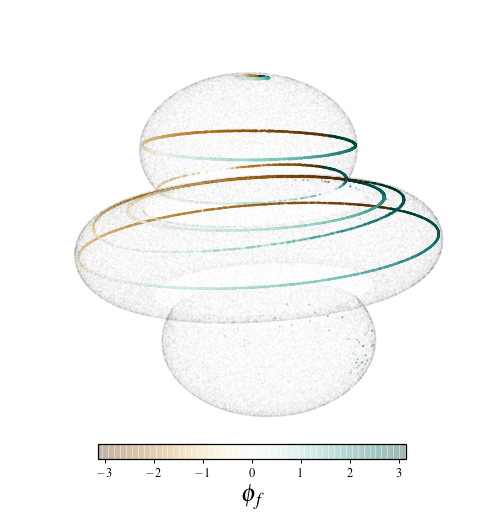

In [90]:
fileN = "CSurface_MassAx_2.0e-5_AxionG_1.0e-12_ThetaM_0.2_rotPulsar_1.67_B0_1.0e14_Ax_trajs_100000_N_Times_300__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
# file_hits = "Minicluster_Time__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283185307179586_B0_1.0e14_rNS_10.0_MassNS_1.0__AS_ImB_5e3__.npz"
file_hits = "../src/results/Minicluster__MassAx_2.6e-5_AxG_1.0e-14_ThetaM_0.2_rotPulsar_1.67_B0_1.6e14_rNS_10.0_MassNS_1.0_Ntrajs_5000000_NS_Mag_0.00033_NS_Theta_0.0_Mmc_1.0e-12_Rmc_1.86e9__trace_trags__thetaCN__fixed_time_0.0__NFW__.npz"
stockholm = False
b_param = [0.0 , 1e8 , 0.0]
is_axionstar = False
NS_vel_T = 0.0
thetaF = 1.0
theta_eps = 0.02
tag="_Fiducial_thetaNS_0.0_Obs_1.0rad_"
sve=True
make_3d_cloud_projection_single(fileN, file_hits, NS_vel_T=NS_vel_T, b_param=b_param,tag=tag, is_axionstar=is_axionstar, eCut=False, cutIndx=1, sve=sve, plasma=True,ss=.1, maxR=12, thetaF=thetaF, theta_eps=theta_eps)

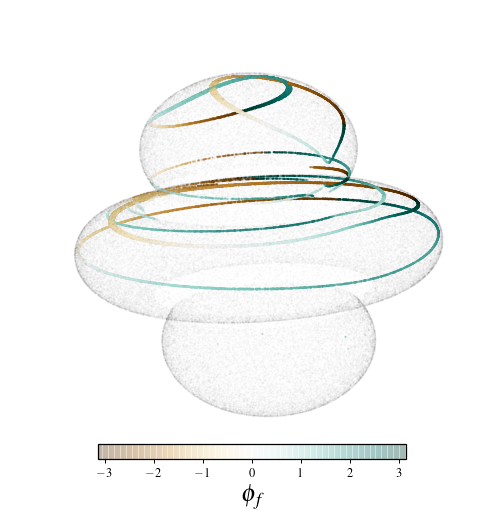

In [91]:
fileN = "CSurface_MassAx_2.0e-5_AxionG_1.0e-12_ThetaM_0.2_rotPulsar_1.67_B0_1.0e14_Ax_trajs_100000_N_Times_300__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
file_hits = "../src/results/Minicluster__MassAx_2.6e-5_AxG_1.0e-14_ThetaM_0.2_rotPulsar_1.67_B0_1.6e14_rNS_10.0_MassNS_1.0_Ntrajs_5000000_NS_Mag_0.00033_NS_Theta_0.785_Mmc_1.0e-12_Rmc_1.86e9__trace_trags__thetaCN__fixed_time_0.0__NFW__.npz"
# file_hits = "../src/results/Minicluster__MassAx_2.6e-5_AxG_1.0e-14_ThetaM_0.2_rotPulsar_1.67_B0_1.6e14_rNS_10.0_MassNS_1.0_Ntrajs_5000000_NS_Mag_0.00033_NS_Theta_0.0_Mmc_1.0e-12_Rmc_1.86e9__trace_trags__thetaCN__fixed_time_0.0__NFW__.npz"
stockholm = False
b_param = [0.0, 1e8, 0.0]
is_axionstar = False
NS_vel_T = 0.785
thetaF = 1.0
theta_eps = 0.02
tag="_Fiducial_thetaNS_0.785_Obs_1.0rad_"
sve=True
make_3d_cloud_projection_single(fileN, file_hits, NS_vel_T=NS_vel_T, b_param=b_param, is_axionstar=is_axionstar, eCut=False, cutIndx=1, sve=sve, plasma=True, tag=tag,ss=.1, maxR=12, thetaF=thetaF, theta_eps=theta_eps)

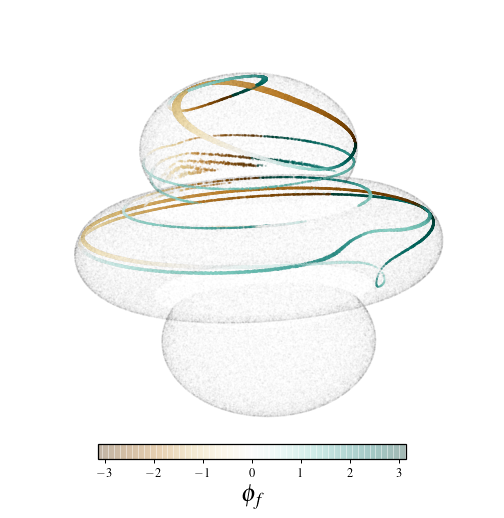

In [92]:
fileN = "CSurface_MassAx_2.0e-5_AxionG_1.0e-12_ThetaM_0.2_rotPulsar_1.67_B0_1.0e14_Ax_trajs_100000_N_Times_300__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
file_hits = "../src/results/Minicluster__MassAx_2.6e-5_AxG_1.0e-14_ThetaM_0.2_rotPulsar_1.67_B0_1.6e14_rNS_10.0_MassNS_1.0_Ntrajs_5000000_NS_Mag_0.00033_NS_Theta_1.57_Mmc_1.0e-12_Rmc_1.86e9__trace_trags__thetaCN__fixed_time_0.0__NFW__.npz"
# file_hits = "../src/results/Minicluster__MassAx_2.6e-5_AxG_1.0e-14_ThetaM_0.2_rotPulsar_1.67_B0_1.6e14_rNS_10.0_MassNS_1.0_Ntrajs_5000000_NS_Mag_0.00033_NS_Theta_0.0_Mmc_1.0e-12_Rmc_1.86e9__trace_trags__thetaCN__fixed_time_0.0__NFW__.npz"
stockholm = False
b_param = [0.0, 1e8, 0.0]
is_axionstar = False
NS_vel_T = 1.57
thetaF = 1.0
theta_eps = 0.02
tag="_Fiducial_thetaNS_1.57_Obs_1.0rad_"
sve=True
make_3d_cloud_projection_single(fileN, file_hits, NS_vel_T=NS_vel_T, b_param=b_param, is_axionstar=is_axionstar, eCut=False, cutIndx=1, sve=sve, plasma=True, tag=tag,ss=.1, maxR=12, thetaF=thetaF, theta_eps=theta_eps)

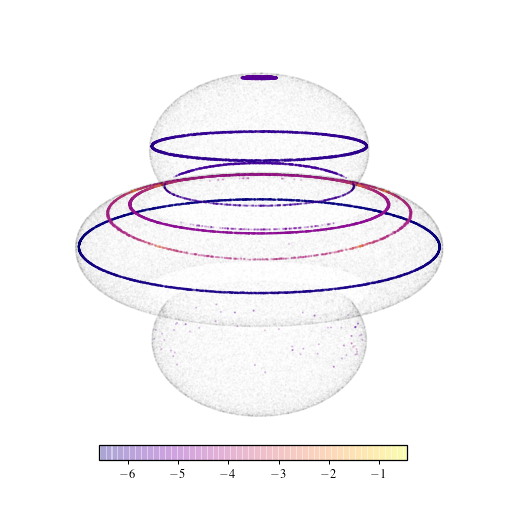

In [21]:
fileN = "CSurface_MassAx_2.0e-5_AxionG_1.0e-12_ThetaM_0.2_rotPulsar_1.67_B0_1.0e14_Ax_trajs_100000_N_Times_300__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
# file_hits = "Minicluster_Time__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283185307179586_B0_1.0e14_rNS_10.0_MassNS_1.0__AS_ImB_5e3__.npz"
file_hits = "../src/results/Minicluster__MassAx_2.6e-5_AxG_1.0e-14_ThetaM_0.2_rotPulsar_1.67_B0_1.6e14_rNS_10.0_MassNS_1.0_Ntrajs_5000000_NS_Mag_0.00033_NS_Theta_0.0_Mmc_1.0e-12_Rmc_1.86e9__trace_trags__thetaCN__fixed_time_0.0__NFW__.npz"
stockholm = False
b_param = [0.0 , 1e8 , 0.0]
is_axionstar = False
NS_vel_T = 0.0
thetaF = 1.0
theta_eps = 0.02
tag="_Fiducial_thetaNS_0.0_Obs_1.0rad_"
sve=False
c_indx = 16
c_lab = r""
c_log=True
azim_a = 0.0
make_3d_cloud_projection_single(fileN, file_hits, NS_vel_T=NS_vel_T, b_param=b_param,tag=tag, is_axionstar=is_axionstar, eCut=False, cutIndx=1, sve=sve, plasma=True,ss=.1, maxR=12, thetaF=thetaF, theta_eps=theta_eps, c_indx=c_indx, c_lab=c_lab, c_log=c_log, azim_a=azim_a)

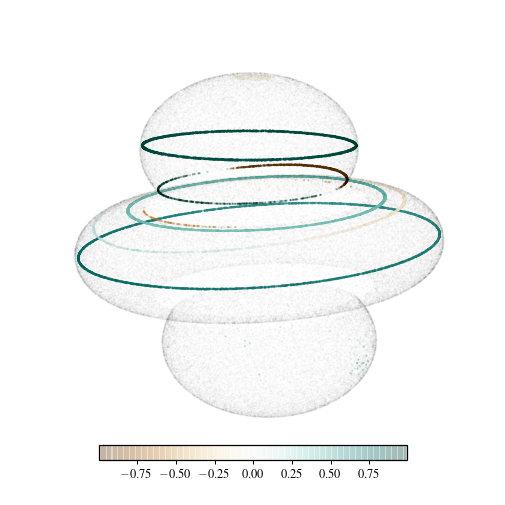

In [11]:
fileN = "CSurface_MassAx_2.0e-5_AxionG_1.0e-12_ThetaM_0.2_rotPulsar_1.67_B0_1.0e14_Ax_trajs_100000_N_Times_300__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
# file_hits = "Minicluster_Time__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283185307179586_B0_1.0e14_rNS_10.0_MassNS_1.0__AS_ImB_5e3__.npz"
file_hits = "../src/results/Minicluster__MassAx_2.6e-5_AxG_1.0e-14_ThetaM_0.2_rotPulsar_1.67_B0_1.6e14_rNS_10.0_MassNS_1.0_Ntrajs_5000000_NS_Mag_0.00033_NS_Theta_0.0_Mmc_1.0e-12_Rmc_1.86e9__trace_trags__thetaCN__fixed_time_0.0__NFW__.npz"
stockholm = False
b_param = [0.0 , 1e8 , 0.0]
is_axionstar = False
NS_vel_T = 0.0
thetaF = 1.0
theta_eps = 0.02
tag="_Fiducial_thetaNS_0.0_Obs_1.0rad_"
sve=False
c_indx = 17
c_lab = r""
c_log=False
make_3d_cloud_projection_single(fileN, file_hits, NS_vel_T=NS_vel_T, b_param=b_param,tag=tag, is_axionstar=is_axionstar, eCut=False, cutIndx=1, sve=sve, plasma=True,ss=.1, maxR=12, thetaF=thetaF, theta_eps=theta_eps, c_indx=c_indx, c_lab=c_lab, c_log=c_log)